In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("D:\Documents\Music\Data\\features_3_sec.csv")
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [37]:
len(df)

9990

In [3]:
print("df.shape = ",df.shape)
print("df.dtype := \n",df.dtypes)

df.shape =  (9990, 60)
df.dtype := 
 filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [5]:
df = df.drop(labels='filename', axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


#### 1. Visualizing the audio

librosa is a python package for music and audio analysis. 
It provides the building blocks necessary to create music information retrieval systems.

In [6]:
audio_example = "D:\Documents\Music\Data\\genres_original//hiphop//hiphop.00015.wav"

Load an audio file as a floating point time series.
Audio will be automatically resampled to the given rate

Returns ndarray and sampling rate of y




In [7]:
data, sr = librosa.load(audio_example)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
#sr - sampling rate- number of samples per second.
#Human audible range - 20 kHz
#But it will be too long, let's take some short to say 45000 kHz
librosa.load(audio_example, sr = 45000)

(array([ 0.03292409, -0.03524673, -0.12031323, ...,  0.01386641,
         0.05867687,  0.04642978], dtype=float32),
 45000)

In [9]:
import IPython
IPython.display.Audio(data, rate = sr)

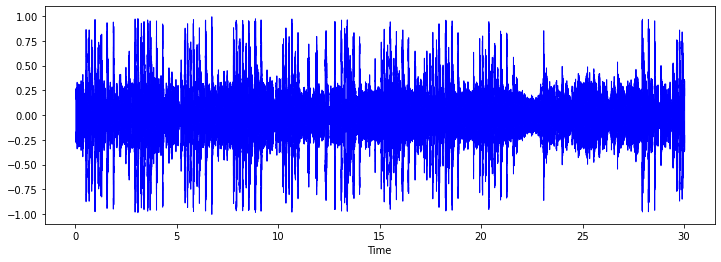

In [10]:
import librosa.display
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="blue")
plt.show()

Short-time Fourier transform (STFT).

librosa.load- takes input music file, returns audio time series
librosa.stft- takes input signal, returns complex-valued matrix of short-term Fourier transform coefficients
librosa.amplitude_to_sb- takes input amplitude, say s, returns s in dB.

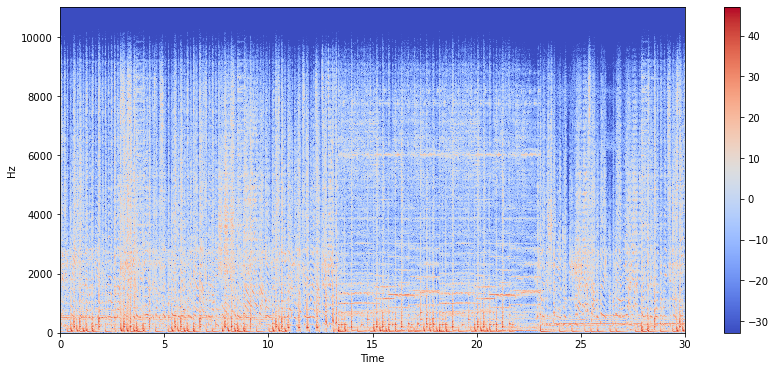

In [11]:
#Short-time Fourier transform (STFT)

stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

D:\Anaconda3\envs\open\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[ 0.04549194 -0.11539673 -0.06580567 ...  0.11067749 -0.03244995
  0.07140137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


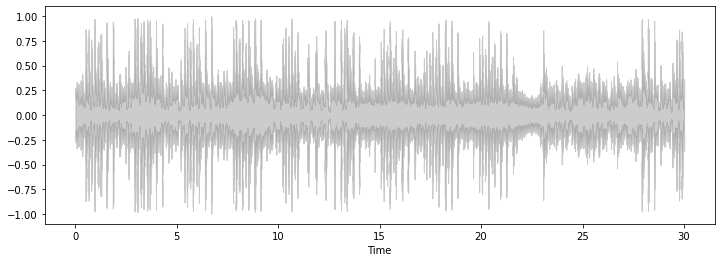

In [12]:
from sklearn.preprocessing import normalize

spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize = (12,4))
librosa.display.waveshow(data, sr = sr, alpha = 0.4, color="grey")

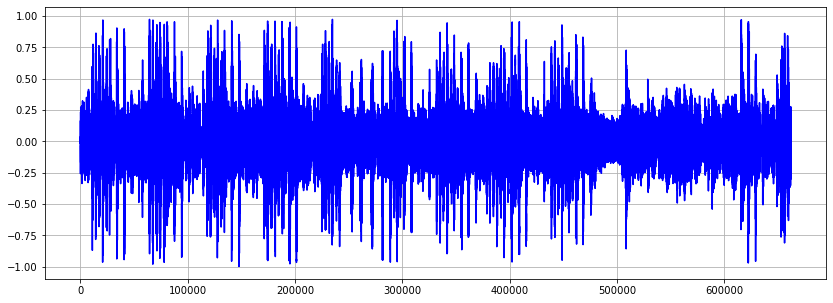

In [17]:
plt.figure(figsize=(14,5))
plt.plot(data, color = "blue")
plt.grid()

In [18]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("Number of zero crossings is ", sum(zero_cross_rate))

Number of zero crossings is  24


In [19]:
total_zero_cross_rate = librosa.zero_crossings(data, pad=False)
print("Total zero_crossings are ", sum(total_zero_cross_rate))

Total zero_crossings are  76964


### Feature Extraction

In [20]:
labels = df.iloc[:, -1]
le = LabelEncoder()

In [21]:
y = le.fit_transform(labels)
y

array([0, 0, 0, ..., 9, 9, 9])

In [22]:
df.iloc[:, :-1].head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [23]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()

X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

In [25]:
print(len(Y_train))
print(len(Y_test))

7492
2498


### Building the Model

There are many ways to train the models, some of which are Multiclass Support Vector Machines, K-Means Clustering, K-Nearest Neighbors, Convolutional Neural Networks.


We will be using CNN Algorithm for training our model, because various forms of research show it to have the best results for this problem.

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
def train_model(model, epochs, optimizer):
    batch_size = 128
    
    model.compile(optimizer = optimizer, 
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs, batch_size=batch_size)

In [28]:
def plotValidate(history):
    print("validation accuracy ", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax'),
])

print(model.summary())

model_history = train_model(model = model, epochs = 100, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 5

59/59 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.7443 - val_loss: 0.5807 - val_accuracy: 0.8795
Epoch 48/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.7479 - val_loss: 0.5359 - val_accuracy: 0.8887
Epoch 49/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.7547 - val_loss: 0.5740 - val_accuracy: 0.8867
Epoch 50/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.7545 - val_loss: 0.5510 - val_accuracy: 0.8955
Epoch 51/100
59/59 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.7497 - val_loss: 0.5312 - val_accuracy: 0.8927
Epoch 52/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6619 - accuracy: 0.7541 - val_loss: 0.5668 - val_accuracy: 0.8899
Epoch 53/100
59/59 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.7561 - val_loss: 0.5683 - val_accuracy: 0.8903
Epoch 54/100
59/59 

In [30]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size = 128)

print("Test loss is \n", test_loss)
print("\nThe best accuracy is :", test_acc*100)

20/20 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.8927
Test loss is 
 0.6078770160675049

The best accuracy is : 89.27141427993774
